# All in one

In [14]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


### data preprocess
Here I extract MFCC from the audio data (you can ignore it since the processed result - `data.json` is already there)

In [15]:
from utils.preprocess import load_audio
from utils.params import Params

params = Params("hparams.yaml", "preprocess")
load_audio(params)

Processing pop


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


Processing metal


100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


Processing disco


100%|██████████| 100/100 [00:35<00:00,  2.82it/s]


Processing blues


100%|██████████| 100/100 [00:35<00:00,  2.79it/s]


Processing reggae


100%|██████████| 100/100 [00:33<00:00,  3.03it/s]


Processing classical


100%|██████████| 100/100 [00:35<00:00,  2.80it/s]


Processing rock


100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


Processing hiphop


100%|██████████| 100/100 [00:35<00:00,  2.83it/s]


Processing country


100%|██████████| 100/100 [00:35<00:00,  2.78it/s]


Processing jazz


100%|██████████| 100/100 [00:35<00:00,  2.83it/s]


Saving data to data.json


### Function to draw loss chart

In [23]:
import json
import matplotlib.pyplot as plt

def draw_loss_graph(log_path: str):
    with open(log_path, 'r') as f:
        loss = json.load(f)
    train_loss = [l[1]['train_loss'] for l in loss.items()]
    val_loss = [l[1]['val_loss'] for l in loss.items()]
    plt.plot(train_loss, label='train')
    plt.plot(val_loss, label='valid')
    plt.legend()
    plt.show()

### Clear all logs & checkpoints (Optional)

In [17]:
! bash clear.sh

### Train CNN model

In [18]:
! python train.py CNN

Loading data from data.json
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.45it/s]
EPOCH 1, train_loss: 1.806894112070766, val_loss: 1.464516520500183, val_acc: 0.489652870493992
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 20.95it/s]
EPOCH 2, train_loss: 1.4780235110072915, val_loss: 1.282529592514038, val_acc: 0.5430574098798397
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 20.96it/s]
EPOCH 3, train_loss: 1.338206006572881, val_loss: 1.1587636470794678, val_acc: 0.599799732977303
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.27it/s]
EPOCH 4, train_loss: 1.2386202716499293, val_loss: 1.0883574485778809, val_acc: 0.6188251001335113
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 20.27it/s]
EPOCH 5, train_loss: 1.1440494358539581, val_loss: 1.064339518547058, val_acc: 0.6188251001335113
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 20.35it/s

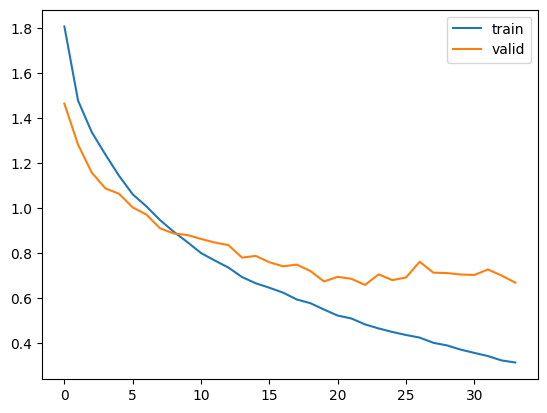

<Figure size 640x480 with 0 Axes>

In [19]:
draw_loss_graph('logs/cnn.json') 

### Train MLP model

In [20]:
! python train.py MLP

Loading data from data.json
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 255.59it/s]
EPOCH 1, train_loss: 2.2302867108528766, val_loss: 2.1165719032287598, val_acc: 0.33978638184245663
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 283.41it/s]
EPOCH 2, train_loss: 2.1469170593340463, val_loss: 2.1150996685028076, val_acc: 0.34279038718291055
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 284.39it/s]
EPOCH 3, train_loss: 2.133560349635028, val_loss: 2.0797276496887207, val_acc: 0.3741655540720961
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 286.17it/s]
EPOCH 4, train_loss: 2.1189622447031353, val_loss: 2.0737295150756836, val_acc: 0.37683578104138854
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 290.01it/s]
EPOCH 5, train_loss: 2.106148196469753, val_loss: 2.0499424934387207, val_acc: 0.403871829105474
100%|████████████████████████████████████████| 219/219 [00:00<00:00, 287

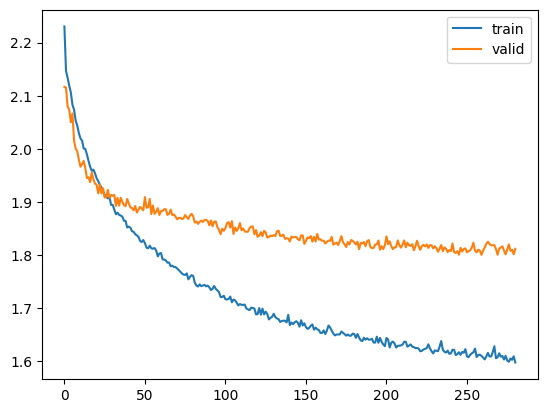

In [24]:
draw_loss_graph('logs/mlp.json')

# LSTM Model

In [25]:
! python train.py LSTM

Loading data from data.json
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.18it/s]
EPOCH 1, train_loss: 2.3094969987869263, val_loss: 2.2851085662841797, val_acc: 0.22563417890520696
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.21it/s]
EPOCH 2, train_loss: 2.2300244482285385, val_loss: 2.1522910594940186, val_acc: 0.33311081441922563
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.10it/s]
EPOCH 3, train_loss: 2.1403048814983543, val_loss: 2.094099760055542, val_acc: 0.37616822429906543
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 21.47it/s]
EPOCH 4, train_loss: 2.1059723895624143, val_loss: 2.0746257305145264, val_acc: 0.3861815754339119
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 20.85it/s]
EPOCH 5, train_loss: 2.0846521706756103, val_loss: 2.078958749771118, val_acc: 0.3741655540720961
100%|█████████████████████████████████████████| 219/219 [00:10<00:00, 2

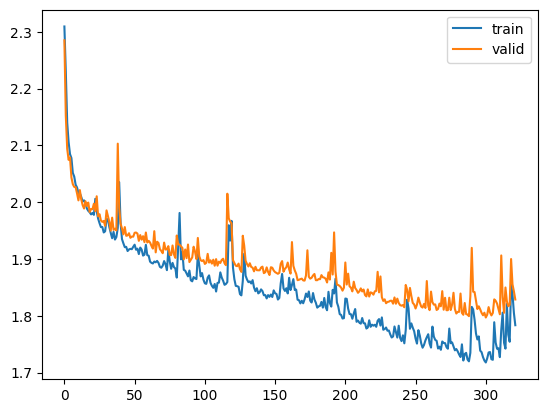

In [26]:
draw_loss_graph('logs/lstm.json')